In [ ]:
!pip install tensorflow

In [ ]:
!nvidia-smi

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/Datasets/'
  "PlantVillage",
  shuffle = True,
  image_size = (IMAGE_SIZE, IMAGE_SIZE),
  batch_size = BATCH_SIZE
)

Found 2755 files belonging to 4 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Cercospora_Leaf_Spot', 'Common_Rust', 'Healthy', 'Northern_Leaf_Blight']

In [ ]:
len(dataset)

87

**Data Distribution(Train-Validation-Test)**

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

69

In [ ]:
len(val_ds)

8

In [ ]:
len(test_ds)

10

**Preprocessing**

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

**Augmentation**

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2)
])

**Applying train data augmentation to train dataset**

In [ ]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
)

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

**Plot model from tf**

In [ ]:
from tensorflow.keras.utils import plot_model

**Visualize**

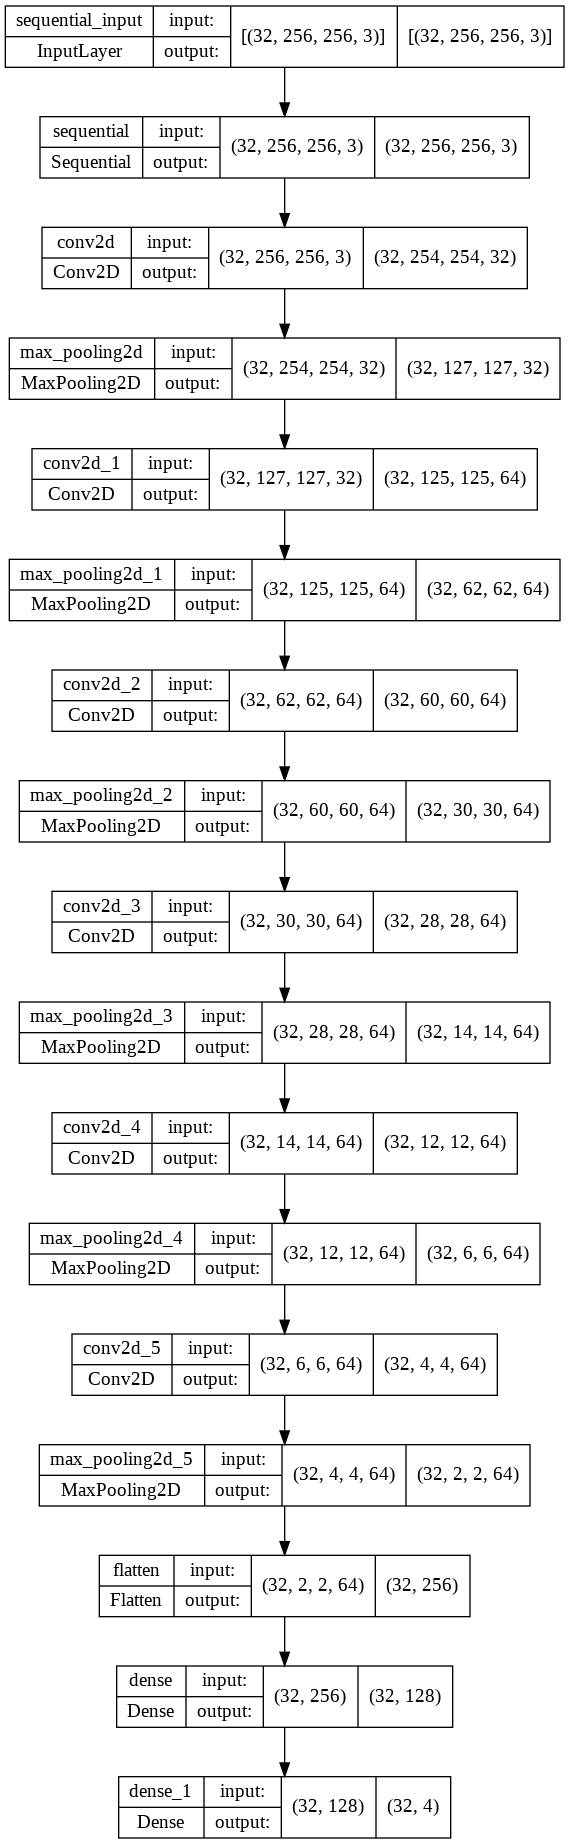

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True)

**Build Model**

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
69/69 [==============================] - 320s 375ms/step - loss: 1.2190 - accuracy: 0.4392 - val_loss: 0.7656 - val_accuracy: 0.7093
Epoch 2/50
69/69 [==============================] - 30s 370ms/step - loss: 0.6496 - accuracy: 0.7136 - val_loss: 0.6911 - val_accuracy: 0.6875
Epoch 3/50
69/69 [==============================] - 30s 368ms/step - loss: 0.5440 - accuracy: 0.7655 - val_loss: 0.5365 - val_accuracy: 0.7383
Epoch 4/50
69/69 [==============================] - 30s 371ms/step - loss: 0.5086 - accuracy: 0.7705 - val_loss: 0.3902 - val_accuracy: 0.8438
Epoch 5/50
69/69 [==============================] - 30s 368ms/step - loss: 0.4758 - accuracy: 0.7935 - val_loss: 0.4966 - val_accuracy: 0.7852
Epoch 6/50
69/69 [==============================] - 30s 372ms/step - loss: 0.3967 - accuracy: 0.8311 - val_loss: 0.2432 - val_accuracy: 0.8984
Epoch 7/50
69/69 [==============================] - 30s 370ms/step - loss: 0.3240 - accuracy: 0.8637 - val_loss: 0.4033 - val_accuracy: 0.881

In [ ]:
scores = model.evaluate(test_ds)

10/10 [==============================] - 5s 32ms/step - loss: 0.0796 - accuracy: 0.9719


**Plotting the Accuracy**

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

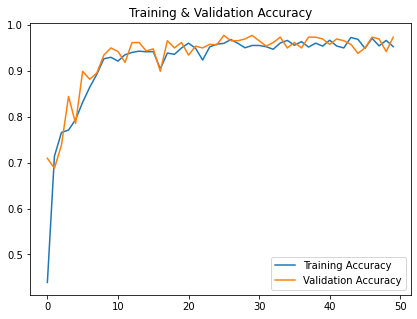

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training & Validation Accuracy')
plt.show()

**Prediction on Test dataset**

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

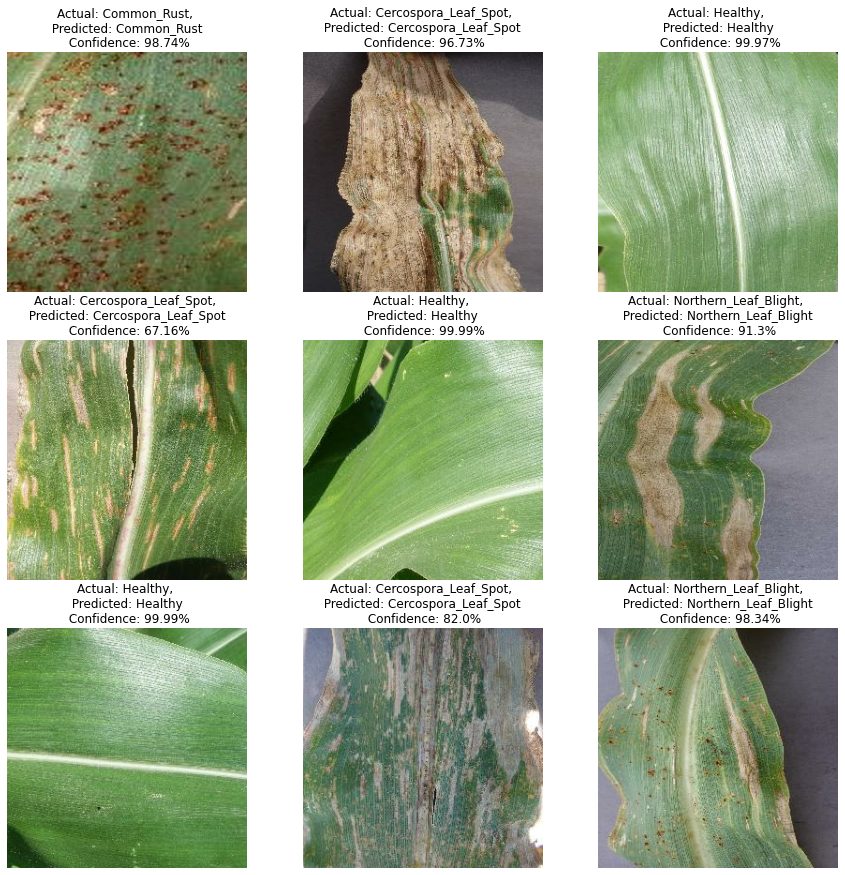

In [ ]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
  for i in range (9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))

    predicted_class, confidence = predict(model, images[i].numpy())
    actual_class = class_names[labels[i]]

    plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class} \n Confidence: {confidence}%")
    plt.axis("off")

In [ ]:
# Save model
model.save("trained_model.h5")

In [ ]:
# Load model
from tensorflow.keras.models import load_model
model = load_model('trained_model.h5')

In [ ]:
model.summary()

**Feature Map Visualization**

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [ ]:
img_path='/content/drive/MyDrive/Datasets/PlantVillage/Common_Rust/image (1).JPG'

In [ ]:
successive_outputs = [layer.output for layer in model.layers[1:]]

In [ ]:
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

In [ ]:
img = load_img(img_path, target_size=(256, 256))

In [ ]:
x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)

In [ ]:
x /= 255.0

In [ ]:
successive_feature_maps = visualization_model.predict(x)

(1, 254, 254, 32)
(1, 127, 127, 32)
(1, 125, 125, 64)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


(1, 62, 62, 64)
(1, 60, 60, 64)
(1, 30, 30, 64)
(1, 28, 28, 64)
(1, 14, 14, 64)
(1, 12, 12, 64)
(1, 6, 6, 64)
(1, 4, 4, 64)
(1, 2, 2, 64)
(1, 256)
(1, 128)
(1, 4)


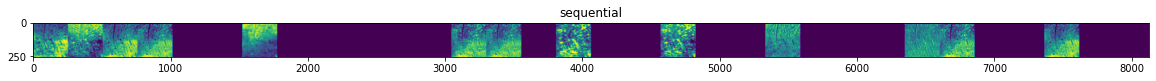

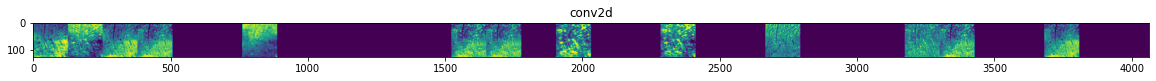

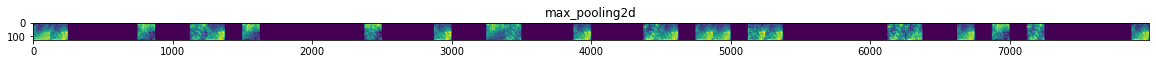

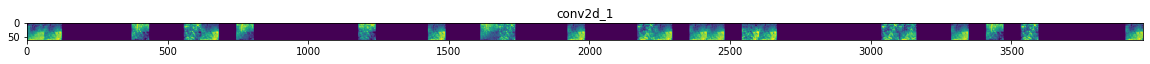

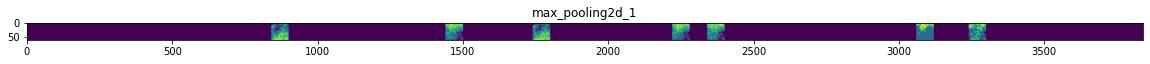

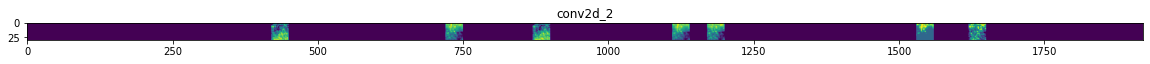

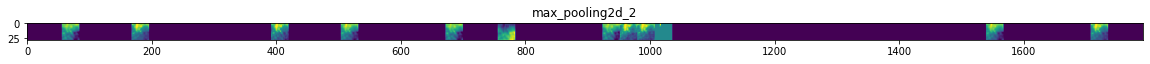

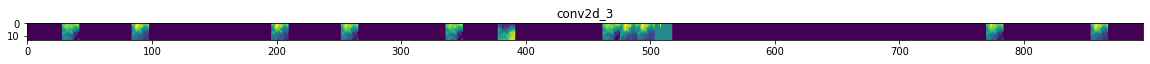

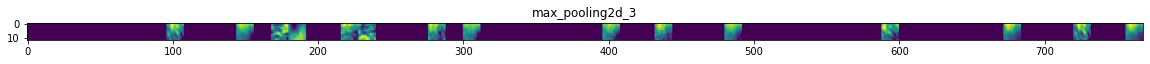

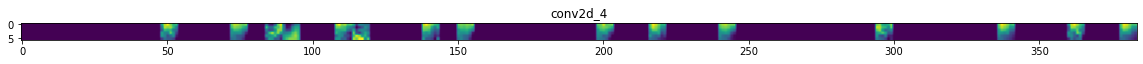

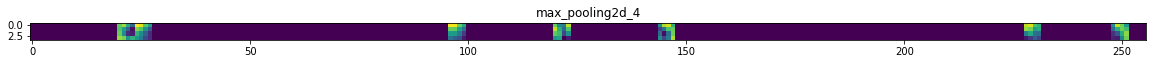

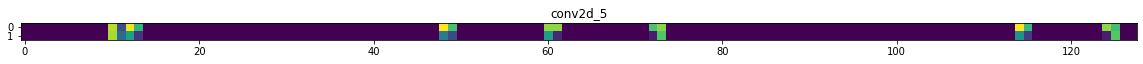

In [ ]:
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

**Gradio Web App Integration**

In [ ]:
!pip install gradio

     |████████████████████████████████| 2.9 MB 8.8 MB/s 
     |████████████████████████████████| 84 kB 3.8 MB/s 
     |████████████████████████████████| 1.1 MB 58.5 MB/s 
     |████████████████████████████████| 253 kB 65.2 MB/s 
     |████████████████████████████████| 2.0 MB 56.9 MB/s 
     |████████████████████████████████| 211 kB 70.0 MB/s 
     |████████████████████████████████| 53 kB 2.5 MB/s 
     |████████████████████████████████| 54 kB 3.6 MB/s 
     |████████████████████████████████| 94 kB 3.2 MB/s 
     |████████████████████████████████| 271 kB 75.6 MB/s 
     |████████████████████████████████| 144 kB 76.8 MB/s 
     |████████████████████████████████| 58 kB 7.9 MB/s 
     |████████████████████████████████| 10.9 MB 61.0 MB/s 
     |████████████████████████████████| 79 kB 10.5 MB/s 
     |████████████████████████████████| 43 kB 2.8 MB/s 
     |████████████████████████████████| 61 kB 611 kB/s 
     |████████████████████████████████| 856 kB 64.4 MB/s 
     |███████████████████████

In [ ]:
import gradio as gr

In [ ]:
def predict_image(img):
  img_4d=img.reshape(-1,256,256,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(4)}

In [ ]:
image = gr.inputs.Image(shape=(256,256))
label = gr.outputs.Label(num_top_classes=4)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://44688.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)
